# Колике су разлике еколошког отиска међу регионима?
До сада смо анализирали укупни еколошки отисак, еколошки дефицит и еколошке резерве држава користећи просечан ниво прихода као критеријум за груписање. У нарених неколико примера бавићемо се поређењем држава са различитих континената. То значи да ћемо користити варијаблу *Region* као групишућу, односно категоријалну. 
<BR><BR>
Као и до сада, учитавамо кориговане податке које смо припремили у првој лекцији.

In [1]:
import pandas as pd

otisak = pd.read_csv('podaci/NFA 2021 v2.csv')

Вредности варијабле *Total Ecological Footprint* груписаћемо по регионима и упоредићемо дистрибуције помоћу кутијастог дијаграма. Обратите пажњу на разлике између аритметичких средина које су приказане кружићима и и медијане дистрибуције приказазане линијама унутар кутије. Такође обратите пажњу на облике дистрибуција поредећи дужине левог и десног "брка" кутијастог дијаграма. На крају, звездицама су означени аберантни резултати или аутлајери. Постоје различити критеријуми за "проглашавање" неког резултата аутлајером, али обично се користе они које је предложио __[*Džon Tuki*](https://en.wikipedia.org/wiki/Outlier#Tukey's_fences)__, амерички статистичар који је осмислио и кутијасти дијаграм. 

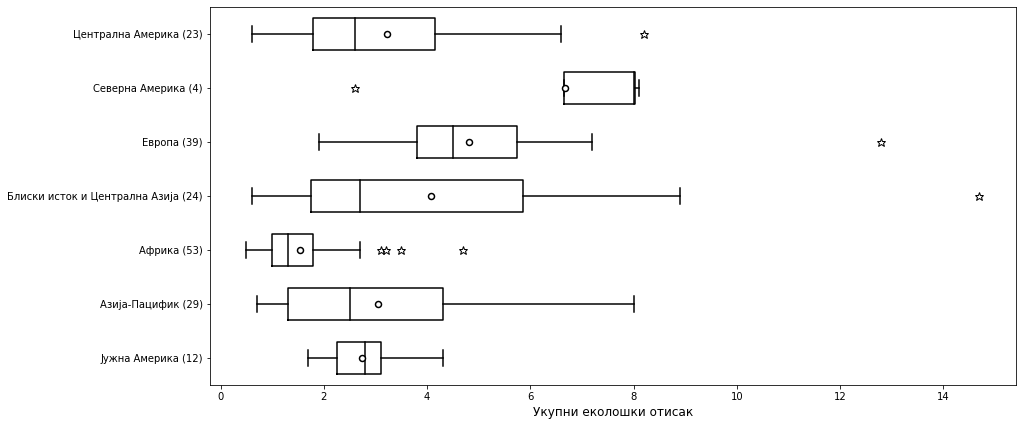

In [2]:
import matplotlib.pyplot as plt

# Правимо копију скупа коју ћемо на крају обрисати
otisakBox = otisak[['Region', 'Total Ecological Footprint']].copy() 

# Променићемо називе региона у самом скупу и објединити категорије 'EU-28' и 'Other Europe'
otisakBox.replace({'EU-28': 'Европа', 
                     'Other Europe': 'Европа',
                     'Africa': 'Африка',
                     'Asia-Pacific': 'Азија-Пацифик',
                     'North America': 'Северна Америка',
                     'South America': 'Јужна Америка',
                     'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                     'Central America/Caribbean': 'Централна Америка'
                    }, inplace=True)

# Овде дефинишемо изглед линија,
forLin = dict(linestyle='-', linewidth=1.5, color='black')

# овде изглед аутлајера,
forMar = dict(marker='*', markerfacecolor='white', markeredgecolor='black', markersize=9, markeredgewidth=1)

# а овде аритметичке средине
forAS = dict(marker='o', markerfacecolor='white', markeredgecolor='black', markersize=6, markeredgewidth=1.5)

# Припрема графикона
boks = otisakBox.sort_values('Region').boxplot(figsize=[14,7], column='Total Ecological Footprint', by='Region',
               vert=False, grid=False, flierprops=forMar, meanprops=forAS, 
               whiskerprops=forLin, capprops=forLin, boxprops=forLin, widths=0.6,
               medianprops=forLin, showmeans=True, showfliers=True
              ) 
plt.xlabel('Укупни еколошки отисак', fontsize=12)
plt.suptitle('')
plt.title('')

# У наредних неколико редова ћемо уз називе региона на y-оси дописати број држава које их чине
brDrz = otisakBox.sort_values('Region').groupby('Region').count().reset_index()
regioni = boks.axes.get_yticklabels()
for reg in regioni:
    ime = reg.get_text()
    reg.set_text(ime + ' (' + str(brDrz[brDrz['Region']==ime].iloc[0]['Total Ecological Footprint']) + ')')
boks.axes.set_yticklabels(regioni)

# На крају приказујемо графикон
plt.show()

del otisakBox

Најпре уочавамо да је варијбилност еколошког отиска међу државама и међу континентима веома велика. Код већине дистрибуција дужина десног "брка" и положај медијане која је мања од аритметичке средине говори нам да су дистирбуције позитивно искошене, тј. да су одступања од типичних вредости већа у нјеном десном делу. Иако поређења региона нису потпуно оправдана због великих разлика међу државама унутар истог региона, може се уочити да највећи еколошки отисак имају државе Северне Америке, а најмањи афричке државе. Помало чудан облик кутијастог дијаграма у случају Северне Америке првенствено је последица тога што су у ову категорију сврстане само четири државе. Највећу варијабилност унутар једног региона показују државе Блиског истока и Централне Азије.     

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Промените вредност параметра <b>showfliers</b> у <b>True</b> и анализирајте како неприказивање аутлајера утиче на изглед и прегледност кутијастих дијаграма. Израчунајте варијабилност (стандардну девијацију) приказане варијабле по регионима.</div> 

У наредном примеруупотребићемо библиотеку __[Plotly Express](https://plotly.com/python-api-reference/plotly.express.html#px)__ да бисмо приказали профиле региона с обзиром на висину различитих компоненти еколошког отиска коришћењем тзв. *радар* или *паук дијаграма*. Сам назив графикона говори нам како изгледа. У питању је круг издељен на онолико сегмената колико има варијабли. Свака варијабла је представљена линијом која полази из центра круга, а вредности варијабле су изражене удаљеношћу тачки од центра. Спајањем тачака добија се својеврстан профил ентитета (нпр. региона) на више варијабли. 

In [5]:
import plotly.express as px

stnd = False

# Правимо копију података тако што издвајамо колоне 6 до 14 из почетног скупа и бришемо две сувишне
otisakRadar = otisak.iloc[:,6:15].drop(columns=['Population (mil)', 'Income Group']).copy()
otisakRadar.replace({'EU-28': 'Европа', 
                     'Other Europe': 'Европа',
                     'Africa': 'Африка',
                     'Asia-Pacific': 'Азија-Пацифик',
                     'North America': 'Северна Америка',
                     'South America': 'Јужна Америка',
                     'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                     'Central America/Caribbean': 'Централна Америка'
                    }, inplace=True)

# Мењамо називе варијабли и рачунамо њихов просек за државе по регионима
otisakRadar.set_axis(['Region', 'Оранице', 'Пашњаци', 'Шуме', 'CO2', 'Риба', 'Земљиште'], axis=1, inplace=True)
otisakRadar = otisakRadar.groupby('Region').mean()

# На овом месту стандардизујемо вредости да бисмо их лакше упоредили
if stnd:
    for kol in range(0, 6): 
        otisakRadar[otisakRadar.columns[kol]] = otisakRadar[otisakRadar.columns[kol]] /  otisakRadar[otisakRadar.columns[kol]].max()

# Овде колоне табеле претварамо у редове тако да сваки регион добије онолико редова колико има варијабли
# Више информација о функцији stack() можете да пронађете на адреси https://pandas.pydata.org/docs/user_guide/reshaping.html
otisakRadar = otisakRadar.stack().reset_index()

# Мењамо називе колона 
otisakRadar = otisakRadar.rename(columns={otisakRadar.columns[1]: 'Tip', otisakRadar.columns[2]: 'Vrednost'})
graf = px.line_polar(otisakRadar, r="Vrednost", theta="Tip", color="Region", line_close=True, width=700, height=400)
graf.update_layout(margin=dict(l=0, r=0, t=0, b=20), legend=dict(title='Регион', y=1.06, x=-0.3, bgcolor='rgba(0,0,0,0)'))
graf.update_traces(fill='toself', opacity=0.5)
graf.show()

del otisakRadar

У претходним анализама установили смо да је карбонски отисак најзначајнијна компонента еколошког отиска. __[Карбонски отисак](https://www.overshootday.org/how-many-earths-or-countries-do-we-need/)__ представља укупну количину емитованих гасова стаклене баште и обично се изражава у килограмима или тонама еквивалентног CO<sub>2</sub> (CO<sub>2</sub>eq). У скупу отворених података који користимо, ове вредности су конвертоване у површину биолошки продуктивног земљишта потребну да се апсорбују емитовани гасови. Иако су јединице приказаних димензија еквивалентне (gha), велике разлике у распонима отежавају поређење. Стога ћемо вредности стандардизовати на веома једноставан начин - дељењем са максималном вредношћу у низу.
<BR><BR>
Промените вредност варијабле `stnd` у `True` и поново покрените горњи код.Сада се много лакше уочавају разлике међу регионима. Државе Азијско-пасифичког региона се највише ослањају на морски потенцијал, док су у случају Јужне Америке то пашњаци. Као што смо видели и у претходној анализи, државе Северне Америке имају највећи еколошки отисак, а и релативно посматрано највећу емисију гасова стаклене баште и највеће потребе за биокапацитетима типа ораница и шума.

На крају ове лекције поново ћемо се позабавити еколошким отиском у контексту богатства нација, тачније општег благостања становника. Овога пута ћемо анализирати повезаност еколошких резерви и индекса хуманог развоја (ИХР) државa. Употребићемо дијаграм распршења на коме су државе обојене у складу са регионом којем припадају.

In [4]:
import plotly.express as px

# Прво нацртајте графикон са овим поставкама, а потпом направите измене:
otisakSkater = otisak[(otisak['Ecological Deficit or Reserve'].between(-100, 40)) & # поставите други параметар на 40
                      (otisak['Data Quality']=='3A') &                                # промените услов у =='3A'
                      (otisak['HDI']>0)].copy()                                     # промените услов у >0
otisakSkater.replace({'EU-28': 'Европа', 
                      'Other Europe': 'Европа',
                      'Africa': 'Африка',
                      'Asia-Pacific': 'Азија-Пацифик',
                      'North America': 'Северна Америка',
                      'South America': 'Јужна Америка',
                      'Middle East/Central Asia': 'Блиски исток и Централна Азија',
                      'Central America/Caribbean': 'Централна Америка и Кариби'
                     }, inplace=True)
kor = otisakSkater[['HDI', 'Ecological Deficit or Reserve']].corr(method='spearman').iloc[0,1].round(2)

graf = px.scatter(otisakSkater, x='HDI', y='Ecological Deficit or Reserve', template='plotly_white',
                  width=900, height=600, hover_data=['Country'], color='Region', color_discrete_sequence=px.colors.qualitative.Set2
                 )
graf.update_traces(marker=dict(size=8, line=dict(width=1, color='darkgreen')), selector=dict(mode='markers'))
graf.update_layout(margin=dict(l=80, r=0, t=60, b=60), 
                   xaxis_title='Индекс хуманог развоја', yaxis_title='Еколошки дефицит или резерва',
                   legend=dict(title='Регион', y=1, x=1.02, bgcolor='rgba(0,0,0,0)'),
                   title=dict(text='Повезаност ИХР и еколошких резерви по регионима (r = ' + str(kor) + ')'), title_xanchor='center', title_x=0.5
                  )
graf.add_hline(y=0, line_width=1, line_dash='dot', line_color='darkgreen')
graf.add_vline(x=0.7, line_width=1, line_dash='dot', line_color='darkgreen')
graf.show()

del otisakSkater

Прва ствар коју уочавамо на графикону су атипичини и аберантни резултати који умногоме нарушавају изглед графикона. Три државе из групе тзв. Гвајана, које карактерише релативно велика површина и мали број становника, издвајају се по екстремно високим вредностима еколошких резерви. Са друге стране, неколико држава има нулте вредности ИХР, што може да се припише лошем квалитету података. И поред тога, корелација две варијабле је умерена и негативна што показује да државе у којима влада веће благостање генерално имају манје еколошке резерве, односно већи еколошки дефицит.   
<BR><BR>
Načinite promene u uslovima na početku koda u skladu sa datim komentarima i ponovo iscrtajte grafikon.
<BR><BR>
Као што видите, корелација је сада још већа (по апсолутној вредности), а графикон је прегледнији. Ипак, и даље треба имати на уму да се варијабилност еколошког дефицита драстично разликује између држава високог и ниског ИХР. Према препорукама Уједињених нација (__[UNDP](https://en.wikipedia.org/wiki/Human_Development_Index)__) та граница је повучена изнад вредности 0,7. Хоризонтална линија означава равнотежу између расположивих биокапацитета и потреба државе за њима. И овом анализом смо потврдили претходне резултате који говоре у прилог повезаности богатства државе, тачније благостања њених становника, и потреба за биолошким ресурсима. Негативна корелација указује на то да државе са већим ИХР имају мање еколошке резерве, односно већи еколошки дефицит. Тај дефицит је посебно висок код неких европских држава и држава Блиског истока. Са друге стране, већину афричких држава карактерише низак БДП и низак еколошки дефицит.

<div class="alert alert-block alert-info"><img src="slike/zad.png" align="left"/>Које државе са високим индексом хуманог развоја бисте навели као позитивне примере односа према природној средини и биоптенцијалима, а које као негативне и лоше. Какав је тај однос с обзиром на регионе?</div> 